# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **E-commerce Shipping Time Prediction Engine** |

# II. Notebook Target Definition

_Insert Text Here_

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
# from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
X = pd.read_pickle('../../data/processed/X.pkl')
y = pd.read_pickle('../../data/processed/y.pkl')

In [3]:
X.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233
1,2,F,Flight,4,5,216,2,low,M,59,3088
2,3,A,Flight,2,2,183,4,low,M,48,3374
3,4,B,Flight,3,3,176,4,medium,M,10,1177
4,5,C,Flight,2,2,184,3,medium,F,46,2484


In [4]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [5]:
X.shape, y.shape

((10999, 11), (10999,))

## IV.B. Data Information Inspection

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  object
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 945.4+ KB


In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10999 entries, 0 to 10998
Series name: Reached.on.Time_Y.N
Non-Null Count  Dtype
--------------  -----
10999 non-null  int64
dtypes: int64(1)
memory usage: 86.1 KB


## IV.C. Duplicated Values Inspection

In [8]:
X_duplicated = X[X.duplicated(subset="ID", keep=False)]
X_duplicated.shape

(0, 11)

In [9]:
X_duplicated

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms


## IV.D. Data Visualization

### IV.D.1. Target Label Proportion

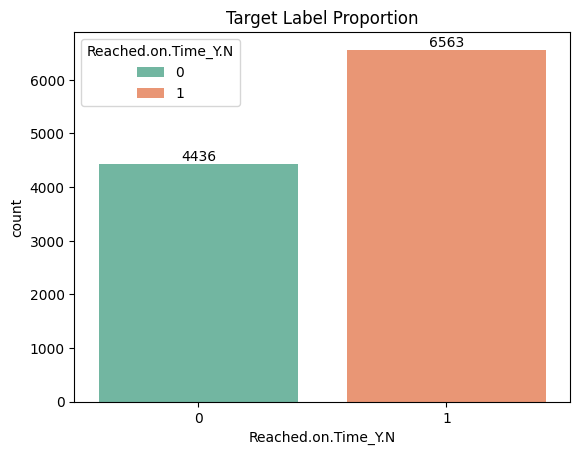

In [10]:
# Barplot
plt.title("Target Label Proportion")
y_proportion = sns.countplot(x=y, hue=y, palette='Set2')
for container in y_proportion.containers:
    y_proportion.bar_label(container)
plt.show()

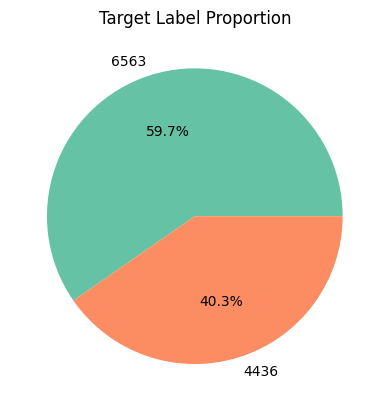

In [11]:
# Pie Chart
plt.title("Target Label Proportion")
plt.pie(x=y.value_counts(),
        labels=y.value_counts(),
        colors=sns.color_palette('Set2'),
        autopct='%1.1f%%')
plt.show()

### IV.D.2. Warehouse Block Distribution

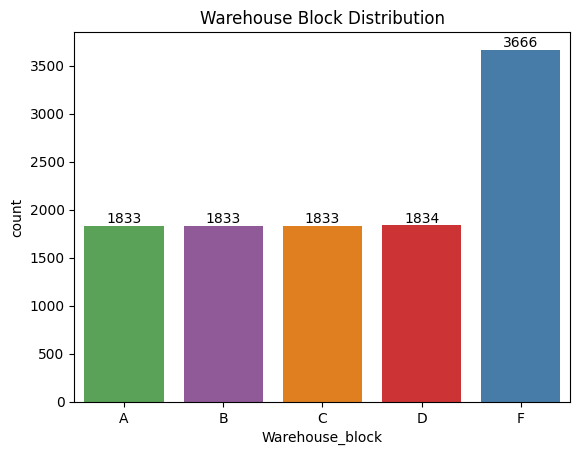

In [12]:
warehouse_order = ["A", "B", "C", "D", "F"]
plt.title("Warehouse Block Distribution")
warehouse_block_distribution = sns.countplot(
    data=X, x="Warehouse_block", hue="Warehouse_block", order=warehouse_order, palette='Set1', legend=False)
for container in warehouse_block_distribution.containers:
    warehouse_block_distribution.bar_label(container)
plt.show()

### IV.D.3. Mode of Shipment Distribution

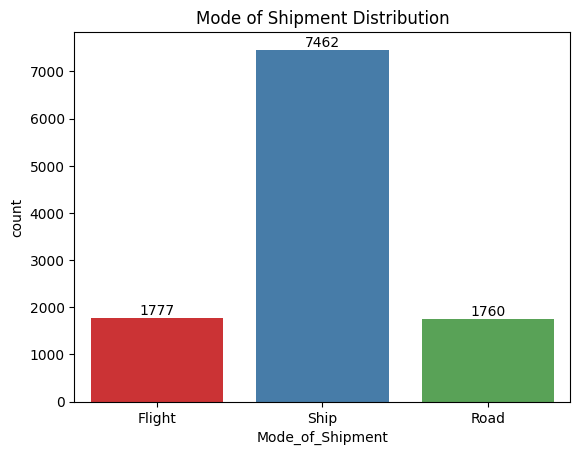

In [13]:
plt.title("Mode of Shipment Distribution")
mode_of_shipment_distribution = sns.countplot(
    data=X, x="Mode_of_Shipment", hue="Mode_of_Shipment", palette='Set1', legend=False)
for container in mode_of_shipment_distribution.containers:
    mode_of_shipment_distribution.bar_label(container)
plt.show()

### IV.D.4. Customer Care Calls Distribution

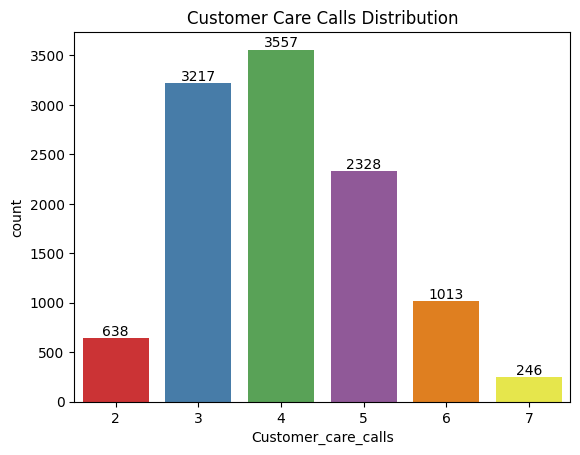

In [14]:
plt.title("Customer Care Calls Distribution")
customer_care_calls_distribution = sns.countplot(
    data=X, x="Customer_care_calls", hue="Customer_care_calls", palette='Set1', legend=False)
for container in customer_care_calls_distribution.containers:
    customer_care_calls_distribution.bar_label(container)
plt.show()

### IV.D.5. Customer Rating Distribution

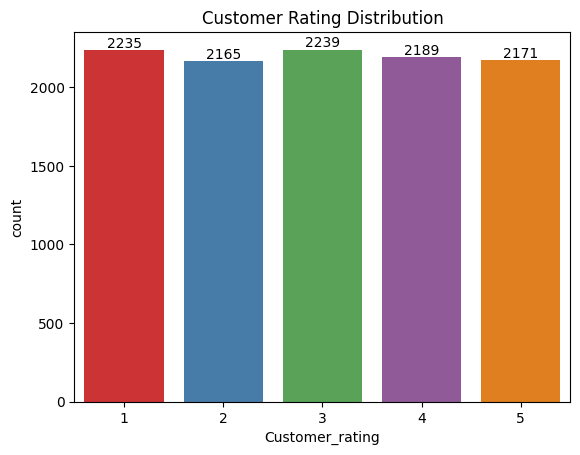

In [15]:
plt.title("Customer Rating Distribution")
customer_rating_distribution = sns.countplot(
    data=X, x="Customer_rating", hue="Customer_rating", palette='Set1', legend=False)
for container in customer_rating_distribution.containers:
    customer_rating_distribution.bar_label(container)
plt.show()

### IV.D.6. Distribution of Cost of the Product

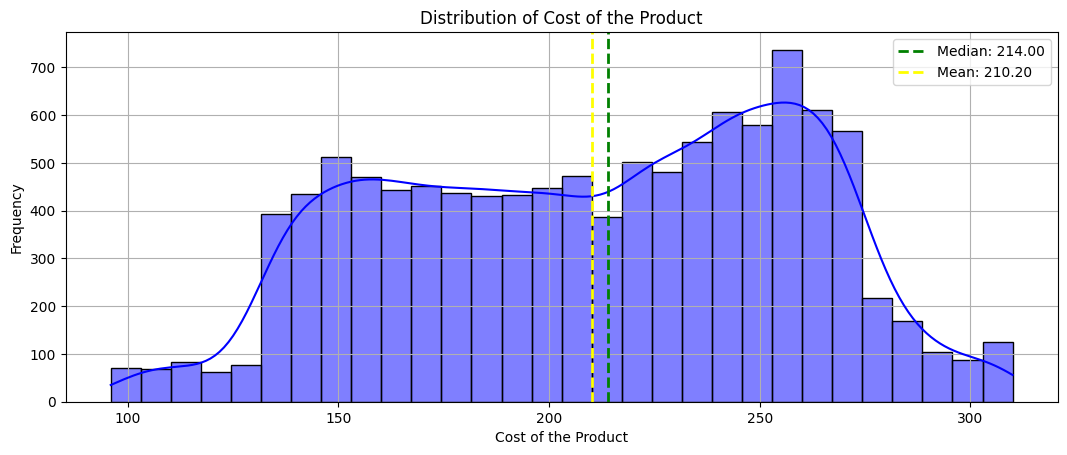

In [16]:
cost_median = X["Cost_of_the_Product"].median()
cost_mean = X["Cost_of_the_Product"].mean()
plt.figure(figsize=(12.8, 4.8))
plt.title("Distribution of Cost of the Product")
sns.histplot(X["Cost_of_the_Product"], kde=True, bins=30, color='blue')
plt.axvline(cost_median, color='green', linestyle='--', linewidth=2, label=f'Median: {cost_median:.2f}')
plt.axvline(cost_mean, color='yellow', linestyle='--', linewidth=2, label=f'Mean: {cost_mean:.2f}')
plt.xlabel("Cost of the Product")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### IV.D.7. Prior Purchases Distribution

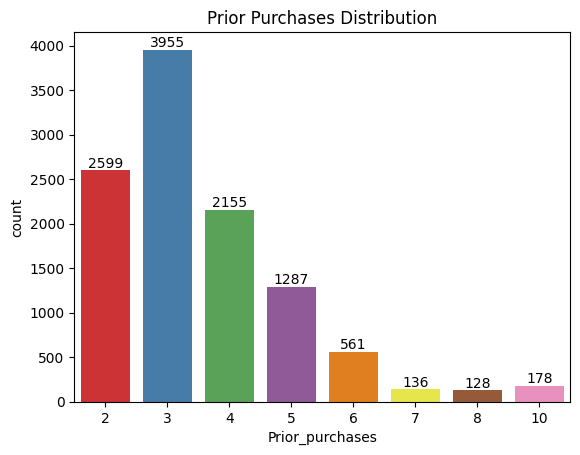

In [17]:
plt.title("Prior Purchases Distribution")
prior_purchases_distribution = sns.countplot(
    data=X, x="Prior_purchases", hue="Prior_purchases", palette='Set1', legend=False)
for container in prior_purchases_distribution.containers:
    prior_purchases_distribution.bar_label(container)
plt.show()

### IV.D.8. Product Importance Distribution

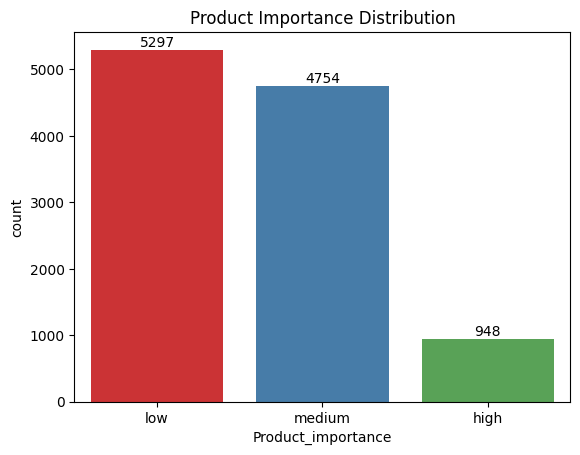

In [18]:
plt.title("Product Importance Distribution")
product_importance_distribution = sns.countplot(
    data=X, x="Product_importance", hue="Product_importance", palette='Set1', legend=False)
for container in product_importance_distribution.containers:
    product_importance_distribution.bar_label(container)
plt.show()

## IV.E. Statistical Analysis

### IV.E.1. Statistical Description

In [ ]:
X.describe()

### IV.F.2. Skewness Analysis

In [ ]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_skewness = X[numeric_columns].skew()
X_skewness = pd.DataFrame(
    {"variables": X_skewness.index, "skewness": X_skewness.values})

In [ ]:
plt.title("Skewness Analysis")
skewness_plot = sns.barplot(x="variables", y="skewness", data=X_skewness)
for container in skewness_plot.containers:
    skewness_plot.bar_label(container)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Variables")
plt.ylabel("Skewness")
plt.show()

### IV.F.3. Chi-Squared Analysis

Analyze the independence or dependence between categorical variables and assess the goodness of fit of observed data to an expected distribution.

In [ ]:
X_categorical = X.select_dtypes(include='object').copy()
X_numerical = X.select_dtypes(include='number').copy()
X_categorical.shape, X_numerical.shape

In [ ]:
X_categorical.columns

In [ ]:
X_numerical.columns

In [ ]:
chi2_list = []

for column in X_categorical.columns:
    cross_tab = pd.crosstab(y, X_categorical[column])
    chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(
        cross_tab)
    chi2_list.append({"variables": column, "p-value": round(p_value, 10)})

chi2_result = pd.DataFrame(chi2_list)
chi2_result = chi2_result.sort_values(by="p-value", ascending=True)
chi2_result.reset_index(drop=True, inplace=True)
chi2_result

### IV.F.4. T-Statistics Analysis

Assess if there is a significant difference in means between two groups, such as comparing the mean scores of a continuous variable between two treatment groups.

In [ ]:
X_numerical.fillna(X_numerical.mean(), inplace=True)

In [ ]:
t_test_results = pd.DataFrame()

for variable in X_numerical.columns:
    group_0_values = X_numerical.loc[y == 0, variable]
    group_1_values = X_numerical.loc[y == 1, variable]
    t_statistic, p_value = ttest_ind(group_0_values, group_1_values)
    result_df = pd.DataFrame(
        {"variables": [variable], "t-statistic": [t_statistic], "p-value": [p_value]})
    t_test_results = pd.concat([t_test_results, result_df], ignore_index=True)

t_test_table = t_test_results.sort_values(by="t-statistic", ascending=False)
t_test_table.reset_index(drop=True, inplace=True)
t_test_table

### IV.F.5. ANOVA F Analysis

Compare more than two groups, such as comparing the mean scores of a continuous variable among different experimental conditions.

In [ ]:
X_numerical.fillna(X_numerical.mean(), inplace=True)

In [ ]:
f_statistic, p_values = f_classif(X_numerical, y)

anova_f_table = pd.DataFrame({"variables": X_numerical.columns,
                             "f-score": f_statistic, "p-value": p_values.round(decimals=10)})
anova_f_table.sort_values(by="f-score", ascending=False,
                          inplace=True, ignore_index=True)
anova_f_table

## IV.G. Correlation Analysis

In [ ]:
corr_matrix = X_numerical.corr()

In [ ]:
plt.title("Correlation Heatmap")
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

In [ ]:
high_corr_list = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname1, colname2 = corr_matrix.columns[i], corr_matrix.columns[j]
            high_corr_list.append([colname1, colname2, corr_matrix.iloc[i, j]])

high_corr_df = pd.DataFrame(high_corr_list, columns=["column_1", "column_2", "correlation_value"])
high_corr_df

# V. Preprocessing

## V.A. Columns Reorder

In [ ]:
custom_order = ["column_0", "column_1", "column_2"]

In [ ]:
X = X.reindex(columns=custom_order)
X.shape

In [ ]:
X.head()

## V.B. Specific Preprocessing

## V.C. Imbalance Data Preprocessing

### V.C.1. Random Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=777)
X_undersampled, y_undersampled = rus.fit_resample(X, y)
y_undersampled.value_counts()

### V.C.2. Random Oversampling

In [ ]:
ros = RandomOverSampler(random_state=777)
X_oversampled, y_oversampled = ros.fit_resample(X, y)
y_oversampled.value_counts()

### V.C.3. Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
categorical_features = X.dtypes == 'object'
categorical_features = categorical_features.tolist()
smote = SMOTENC(categorical_features=categorical_features, random_state=777)
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts()

## V.D. Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777, stratify=y)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

## V.E. Export Data

In [ ]:
X_train.to_pickle('../../data/processed/X_train.pkl')
X_test.to_pickle('../../data/processed/X_test.pkl')
y_train.to_pickle('../../data/processed/y_train.pkl')
y_test.to_pickle('../../data/processed/y_test.pkl')